# Entanglement Assisted Multi-Sender MAC for one-shot Finger Printing

A Bell state is sufficient for an entanglement-assisted advantage in the one-shot finer printing task.
Does this advantage scale to more inputs or senders?

This notebook investigates the one-shot finger printing bounds where a GHZ state is shared amongst $m$ senders each with $n$ inputs. Each sender transmits a single bit to the receiving classical MAC.

*This notebook does not performa a comprehensive search.*

In [1]:
from qnet_context import QNetOptimizer as QNopt
from mac_context import *
import pennylane as qml
import pennylane.numpy as np
import matplotlib.pyplot as plt

## Ansatz

In [2]:
def ea_ghz_state_prep(num_wires):
    return [
        QNopt.PrepareNode(1, range(num_wires), QNopt.ghz_state, 0)
    ]

def ea_local_Rot_meas(num_senders, num_in):
    return [
        QNopt.MeasureNode(num_in, 2, [i], lambda settings, wires: qml.Rot(*settings, wires=wires), 3)
        for i in range(num_senders)
    ]

In [3]:
def finger_printing_matrix(num_senders, num_in):
    """Constructs the matrix containing the winning answers
    for the finger printing game.
    """
    ineq_tensor = np.zeros([num_in]*num_senders)
    match_ids = np.diag_indices(num_in, num_senders)
    
    ineq_tensor[match_ids] = [1] * num_in
    
    success_row = ineq_tensor.reshape(num_in**num_senders)
    error_row = [ (el + 1) % 2 for el in success_row]
        
    return np.array([success_row, error_row])

def parity_postmap(num_bits):
    parity_vector = QNopt.parity_vector(num_bits)
    
    postmap = np.zeros((2, 2**num_bits))
    for i in range(2**num_bits):
        if parity_vector[i] > 0:
            postmap[0,i] = 1
        else:
            postmap[1,i] = 1

    return postmap

In [4]:
def ghz_assisted_finger_printing(num_senders, num_in, **opt_kwargs):

    ansatz = QNopt.NetworkAnsatz(
        ea_ghz_state_prep(num_senders),
        ea_local_Rot_meas(num_senders, num_in)
    )

    fp_mat = finger_printing_matrix(num_senders, num_in)
    postmap = finger_printing_matrix(num_senders, 2)
#     postmap = parity_postmap(num_senders)

    cost = QNopt.linear_probs_cost_fn(ansatz, fp_mat, post_map=postmap)

    print("classical bound : ", 1 + np.sum(fp_mat[1,:]))

    opt_dict = QNopt.gradient_descent(
        cost,
        ansatz.rand_scenario_settings(),
        **opt_kwargs
    )

    print("max score : ", opt_dict["opt_score"])

    behavior = QNopt.behavior_fn(ansatz, post_map=postmap)
    print("optimal behavior : ", np.around(behavior(opt_dict["opt_settings"]), decimals=3))

## Two Senders 3 Input

In [5]:
num_senders = 2
num_in = 3

ghz_assisted_finger_printing(
    num_senders,
    num_in,
    sample_width = 20,
    num_steps = 80,
    step_size = 0.4
)

classical bound :  7.0
iteration :  0 , score :  3.619068481619326
elapsed time :  0.04718804359436035
iteration :  20 , score :  7.497065017776701
elapsed time :  0.13401532173156738
iteration :  40 , score :  7.498941967992065
elapsed time :  0.04632282257080078
iteration :  60 , score :  7.499487562490865
elapsed time :  0.0493009090423584
max score :  7.499730864257384
optimal behavior :  [[1.    0.25  0.252 0.249 1.    0.248 0.249 0.251 1.   ]
 [0.    0.75  0.748 0.751 0.    0.752 0.751 0.749 0.   ]]


In [6]:
num_senders = 2
num_in = 4

ghz_assisted_finger_printing(
    num_senders,
    num_in,
    sample_width = 20,
    num_steps = 80,
    step_size = 0.4
)

classical bound :  13.0
iteration :  0 , score :  8.320930763678682
elapsed time :  0.08291792869567871
iteration :  20 , score :  11.99923472469059
elapsed time :  0.08983397483825684
iteration :  40 , score :  11.999941133788692
elapsed time :  0.0786280632019043
iteration :  60 , score :  11.999994404603209
elapsed time :  0.0797581672668457
max score :  11.999999465416746
optimal behavior :  [[0.928 0.692 0.236 0.    0.691 0.928 0.    0.236 0.236 0.    0.928 0.691
  0.    0.236 0.692 0.928]
 [0.072 0.308 0.764 1.    0.309 0.072 1.    0.764 0.764 1.    0.072 0.309
  1.    0.764 0.308 0.072]]


In [7]:
num_senders = 2
num_in = 5

ghz_assisted_finger_printing(
    num_senders,
    num_in,
    sample_width = 20,
    num_steps = 80,
    step_size = 0.4
)

classical bound :  21.0
iteration :  0 , score :  13.239373885189298
elapsed time :  0.13154816627502441
iteration :  20 , score :  19.9698172499556
elapsed time :  0.12133407592773438
iteration :  40 , score :  19.99955750219714
elapsed time :  0.12247705459594727
iteration :  60 , score :  19.999993113257418
elapsed time :  0.12786579132080078
max score :  19.999999892727732
optimal behavior :  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1.]]


## Three Senders with GHZ Preparations

In [8]:
num_senders = 3
num_in = 3

ghz_assisted_finger_printing(
    num_senders,
    num_in,
    sample_width = 20,
    num_steps = 80,
    step_size = 0.4
)

classical bound :  25.0
iteration :  0 , score :  17.93975470022427
elapsed time :  0.26220202445983887
iteration :  20 , score :  22.01826086722711
elapsed time :  0.19055891036987305
iteration :  40 , score :  22.993302021703013
elapsed time :  0.1766369342803955
iteration :  60 , score :  23.008184464138004
elapsed time :  0.17357087135314941
max score :  23.954111152849883
optimal behavior :  [[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.046 0.046 0.046 0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.   ]
 [1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
  0.954 0.954 0.954 1.    1.    1.    1.    1.    1.    1.    1.    1.
  1.    1.    1.   ]]


In [9]:
num_senders = 3
num_in = 4

ghz_assisted_finger_printing(
    num_senders,
    num_in,
    sample_width = 20,
    num_steps = 80,
    step_size = 0.4
)

classical bound :  61.0
iteration :  0 , score :  47.50147676435395
elapsed time :  0.5475378036499023
iteration :  20 , score :  57.442640122443564
elapsed time :  0.5102951526641846
iteration :  40 , score :  59.994840447834484
elapsed time :  0.5639657974243164
iteration :  60 , score :  59.999999526721474
elapsed time :  0.5164060592651367
max score :  59.99999999995668
optimal behavior :  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


In [10]:
num_senders = 4
num_in = 3

ghz_assisted_finger_printing(
    num_senders,
    num_in,
    sample_width = 20,
    num_steps = 80,
    step_size = 0.4
)

classical bound :  79.0
iteration :  0 , score :  69.70718109226713
elapsed time :  0.8675241470336914
iteration :  20 , score :  78.0
elapsed time :  0.8430802822113037
iteration :  40 , score :  77.99999999999999
elapsed time :  0.8370239734649658
iteration :  60 , score :  78.0
elapsed time :  0.8348121643066406
max score :  78.0
optimal behavior :  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1.]]


## Scratch

In [11]:
import qiskit

with qml.tape.QuantumTape() as tape:
    qml.RX(0.3, wires=0)
    qml.CNOT(wires=[0,1])

    qml.expval(qml.PauliZ(0))

qasm_version = tape.to_openqasm()

In [12]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

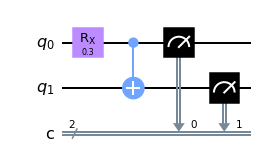

In [13]:
QuantumCircuit.from_qasm_str(qasm_version).draw(output="mpl")